<a href="https://colab.research.google.com/github/brownr16/electromagnetics_modelling/blob/main/MagneticCircuit_EnergyCoenergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Energy and Coenergy</h1></b>

Dr. Bingsen Wang

4/29/2023
</center>

#Energy Input



For a magnetic circuit with winding of $N$ turns, the induced voltage is $v=v(t)$ while the current through the winding is $i=i(t)$.
The electric power input is
$$ p(t) = v(t)i(t)\tag{1}$$

The induced voltage $v$ is related to the flux linkage $\lambda$ by
$$ v(t) = {d\lambda(t) \over dt} \tag{2}$$

Substituting (2) in (1) yields
$$ p(t) = i(t){d\lambda(t) \over dt}\tag{3}$$

The instantaneous energy input to the circuit is
$$w(t) = \int p(t)dt = \int i(\lambda) d\lambda \tag{4}$$

If the flux linkage changes from $\lambda_1$ to $\lambda_2$ within time $t_1$ to $t_2$, the total energy input is
$$\Delta W = \int_{t_1}^{t_2} p(t)dt = \int_{\lambda_1}^{\lambda_2} i(\lambda) d\lambda\tag{5}$$

If no mechanical energy is converted and there is no eddy current loss involved, the input energy that can be positive or negative will increase or decrease the energy stored in the magnetic field, respectively. 







#Energy and Coenergy

Starting from zero initial value to flux linkage $\lambda_1$, the **energy** absorbed by the magnetic field is
$$W_{fld} = \int_0^{\lambda_1}i(\lambda)d\lambda \tag{6}$$

Correspondingly, the current rises from zero initial value to the final value of $i_1$ during the process. The associated **coenergy** is defined as
$$ W'_{fld} = \int_0^{i_1}\lambda(i)di \tag{7}$$

The following alway holds true
$$W_{fld} + W'_{fld} = i_1\lambda_1 \tag{8}$$

If the magnetic circuit is linear, it is further ture that
$$ W_{fld} = W'_{fld} = {1\over2}i_1\lambda_1\tag{9}$$

For an inductor with inductance $L$, the flux linkage is
$$ \lambda_1 = Li_1\tag{10}$$
Substituting (10) in (9) yields the energy and coenergy of the inductor.
$$ W_{fld} = W'_{fld} = {1\over2}L i_1^2\tag{11}$$

#Python Code
The Python code illustrates the energy and coenergy.

<ipython-input-2-5bf220cdc8a4>:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


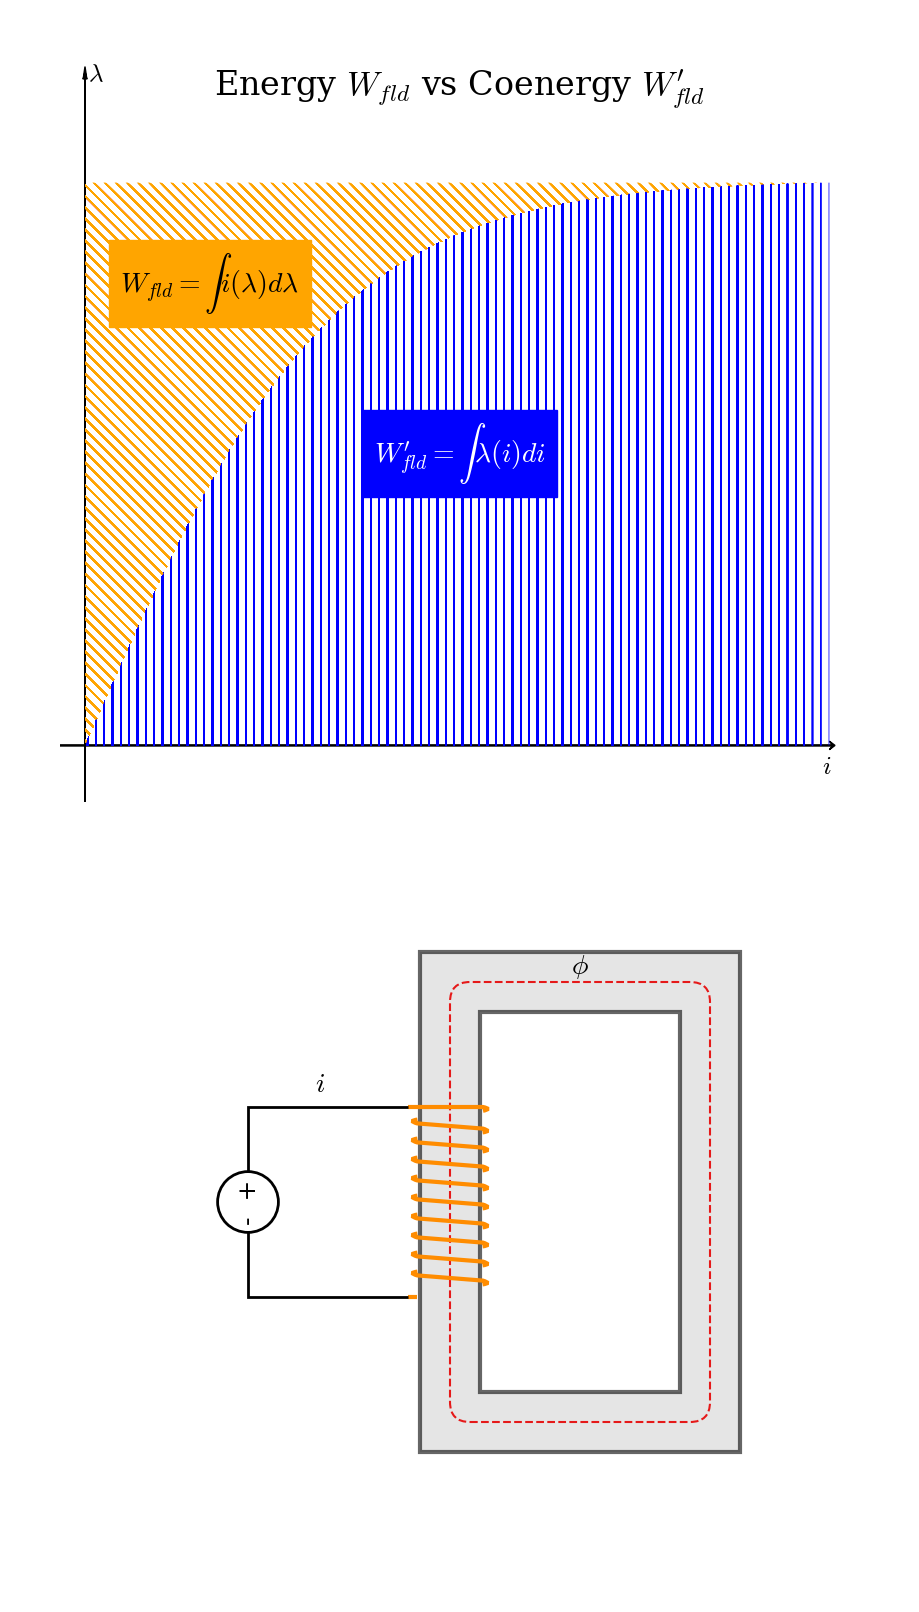

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,heaviside,angle,sqrt,tanh,arctanh,arctan
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba,to_rgb
from matplotlib.text import TextPath
from matplotlib.path import Path
import matplotlib.patches as mp
#  import PathPatch,Arrow,Circle,Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})
#hysteresis loop with i,F,H as independent variable
def fh(x,a0,xm): 
  b1 = 0.5*(tanh(xm+a0) - tanh(xm-a0))
  fha = tanh(x - a0) + b1 #ascending
  fhd = tanh(x + a0) - b1 #descending
  return fha,fhd,

#draw coil
def drawCoil(ax,x0,y0,w,l,n,clr,lw,dir):
  """
  x0,y0: lower left corner of the coil
  w: width of the core that the coil is wound around
  l: length
  n: number of turns
  cl: color
  dir: 1 for right-hand up or left; 0 for opposite direction
  """
  dbt = l/n #distance between turns
  if dir==0:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0+w*1.05,y0),(x0+w*1.2,y0+dbt*0.1),(x0+w*1.05,y0+dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0-w*.05,y0+l)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k-0.2)),
              (x0-w*.2,y0+dbt*(k-0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k+0.1)),
              (x0+w*1.05,y0+dbt*(k+0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  if dir==1:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0+w*1.05,y0+l),(x0+w*1.2,y0+l-dbt*0.1),(x0+w*1.05,y0+l-dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0-w*.05,y0)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k+0.2)),
              (x0-w*.2,y0+dbt*(k+0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k-0.1)),
              (x0+w*1.05,y0+dbt*(k-0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,-arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  return

#draw magnetic circuit
def drawMagCkt(ax,x0,y0,w,h,c):
  """
  x0,y0: center of the magnetic core
  w: width
  h: hight
  c: cross section
  """
  wi = w - 2*c #inner width
  hi = h - 2*c #inner hight
  ax.add_patch(mp.Rectangle((x0-0.5*w,y0-0.5*h),w,h,
               ec=to_rgba('k',0.6),fc=to_rgba('grey',0.2),lw=3 )) #outer boundary of core
  ax.add_patch(mp.Rectangle((x0-0.5*wi,y0-0.5*hi),wi,hi,
               ec=to_rgba('k',0.6),fc='w',lw=3 )) #inner boundary of core    
  drawCoil(ax,x0-w*0.5,y0-0.25*hi,c,0.5*hi,10,'darkorange',3,1)    
  x1=x0-w*0.5-0.2*c
  y1=y0-0.25*hi
  ax.add_patch(mp.PathPatch(Path([(x1,y1),(x1- 0.4,y1),(x1-0.4,y1+0.17*hi),
                               (x1,y1+0.5*hi),(x1- 0.4,y1+0.5*hi),(x1-0.4,y1+0.33*hi)],
                              [Path.MOVETO,Path.LINETO,Path.LINETO,
                               Path.MOVETO,Path.LINETO,Path.LINETO]),
                         lw=2,fc='none'))
  ax.add_patch(mp.Circle((x1-0.4,0),0.08*hi,lw=2,fc='none',ec='k'))
  ax.text(x1-0.395,0,'-  +',va='center', ha='center',rotation='vertical',size=18)
  return

fig = plt.figure(figsize=(9,16))
xylim1 =[3,1.2]
ax1 = fig.add_axes((1/18,0.5 , 8/9, 0.495),xlim=[-0.1,xylim1[0]+0.1], ylim=[-0.1,xylim1[1]+0.1]) # hystersis
xylim2=[9/8,1]
ax2 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
ax3 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

kwargs = {'overhang':0.5,'width':0.002, 'head_width':0.015, 'ec':'k', 'fc':'k', 'length_includes_head':True}
ax1.arrow(-xylim1[0],0,2*xylim1[0],0,**kwargs)
ax1.arrow(0,-xylim1[1],0,2*xylim1[1],**kwargs)
ax1.text(xylim1[0]-0.05,-0.05,r'$i$',size=18)
ax1.text(0.01,xylim1[1]-0.025,r'$\lambda$',size=18)
ax1.text(1.5,1.15,"Energy $W_{fld}$ vs Coenergy $W_{fld}'$",ha='center',size=24)
ax1.text(0.5,0.8,r"$W_{fld}=\int i(\lambda)d\lambda$",backgroundcolor='orange',size=20,color='k',ha='center')
ax1.text(1.5,0.5,r"$W_{fld}'=\int \lambda(i)di$",backgroundcolor='b',size=20,color='w',ha='center')


x0=0.3
y0=0
w=0.8
h=1.25
c=0.15
Nfpp=250
Nf = 1*Nfpp
xm=2.99
x=linspace(0,xm,Nfpp)
lmd = fh(x,0,xm)[0]

ax2.text(-0.35,.275,r'$i$',size=20,ha='center')
ax2.text(0.3,.57,r'$\phi$',size=20,ha='center')
ax2.add_patch(mp.FancyBboxPatch((x0-0.5*w+0.5*c,y0-0.5*h+0.5*c),w-c,h-c,
                                boxstyle='round,pad=0,rounding_size=0.05',
                                fc='none',ec='r',ls='--',lw=1.5)) #flux path

lines = [] #array containing all the line segments
lines.append(ax1.plot([], [], color='r', lw=4)[0])

# animation function.  This is called sequentially
def animate(i):
  lines[0].set_data(x[0:i],lmd[0:i])
  ax1.fill_betweenx(lmd[0:i],x[0:i],0,hatch='\\\\\\', color=to_rgba('orange',0.5), ec='none', fc=to_rgba('none',0.5))
  ax1.fill_between(x[0:i],lmd[0:i],0,hatch='||', color=to_rgba('b',0.8), ec='none', fc=to_rgba('none',0.5))
  ax3.clear()
  ax3.set_xlim(-xylim2[0],xylim2[0])
  ax3.set_ylim(-xylim2[1],xylim2[1])
  ax3.axis('off')
  ax3.add_patch(mp.Arrow(-0.35-x[i]/xm/8,0.26,x[i]/xm/4,0,width=0.05,fc='b')) #current arrow
  ax3.add_patch(mp.Arrow(0.3-lmd[i]/8,y0+0.5*h-0.5*c,lmd[i]/4,0,width=0.075,fc='orange')) #flux arrow
  return

drawMagCkt(ax2,x0,y0,w,h,c)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"MagneticCircuit_EnergyVsCoenergy.mp4" 
writervideo = animation.FFMpegWriter(fps=50) 
anim.save(fn, writer=writervideo,dpi = 120)